<a href="https://colab.research.google.com/github/ridhimagarg/PyTorchBook/blob/main/Chapter00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=fe66e7a64b798c77fe44c8a3d7ec3de1aad4062317df8ae4be6fe33889d33f34
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
import torch
from torchviz import make_dot


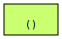

In [ ]:
v = torch.tensor(1.0, requires_grad=True)
make_dot(v)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
true_b = 1
true_w = 2
N = 100

#Data Generation
np.random.seed(42)
x = np.random.rand(N,1)
epsilon = (.1 * np.random.rand(N,1))
y = true_b + x* true_w + epsilon


In [ ]:
idx = np.arange(N)
np.random.shuffle(idx)

train_idx = idx[:int(N*0.8)]
val_idx = idx[int(N*0.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

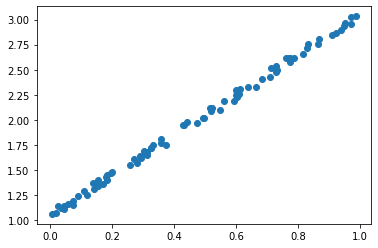

In [ ]:
# plt.fig(figsize=(10,10))
# plt.subplot
plt.plot(x_train, y_train, 'o')

In [ ]:
#Step0: Initilise randomly weights

np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


In [ ]:
yhat = b + w* x_train

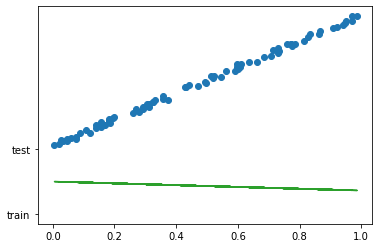

In [ ]:
plt.plot(x_train, y_train, 'o', "train")
plt.plot(x_train, yhat, '-', "test")
# plt.labels('test')

In [ ]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)


2.808129216295391


In [ ]:
# Reminder:
# true_b = 1
# true_w = 2
# we have to split the ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
# meshgrid is a handy function that generates a grid of b and w
# values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape


((101, 101), (101, 101))

In [ ]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [ ]:
ws

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       ...,
       [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
       [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]])

In [ ]:
x_train[0]

array([0.52273283])

In [ ]:
dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x
dummy_yhat.shape

(101, 101)

In [ ]:
dummy_yhat

array([[-2.52273283, -2.46273283, -2.40273283, ...,  3.35726717,
         3.41726717,  3.47726717],
       [-2.49136886, -2.43136886, -2.37136886, ...,  3.38863114,
         3.44863114,  3.50863114],
       [-2.46000489, -2.40000489, -2.34000489, ...,  3.41999511,
         3.47999511,  3.53999511],
       ...,
       [ 0.55093621,  0.61093621,  0.67093621, ...,  6.43093621,
         6.49093621,  6.55093621],
       [ 0.58230018,  0.64230018,  0.70230018, ...,  6.46230018,
         6.52230018,  6.58230018],
       [ 0.61366415,  0.67366415,  0.73366415, ...,  6.49366415,
         6.55366415,  6.61366415]])

In [ ]:
## Now doing it for all the predictions
all_predictions = np.apply_along_axis(func1d=lambda x: bs + ws * dummy_x, axis=1, arr=x_train)
print(all_predictions.shape)

(80, 101, 101)


In [ ]:
all_labels = y_train.reshape(-1,1,1)
all_labels.shape

(80, 1, 1)

In [ ]:
all_errors = (all_predictions- all_labels)
all_errors.shape

(80, 101, 101)

In [ ]:
## averaging over all the data points
all_losses = (all_errors **2).mean(axis=0)
all_losses.shape

(101, 101)

In [ ]:
## Step 3: Computing the gradients.
b_grad = 2* error.mean()
w_grad = 2* (error * x_train).mean()

print(b_grad, w_grad )

-3.108262701823821 -1.8206663430690853


In [ ]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1 ## As far as learning rate is considered, it is very high.
print(b, w)
# Step 4 - Updates parameters using gradients and the
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)
yhat_new = b + w* x_train

[0.80754042] [0.04380233]
[1.11836669] [0.22586897]


Text([0.72900717], [1.33302679], '[b, w]= [1.11836669] [0.22586897]')

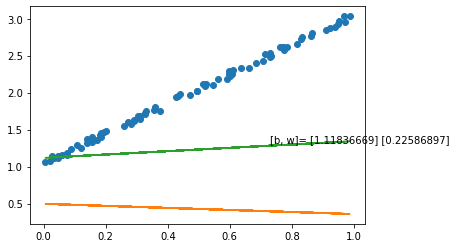

In [ ]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, yhat, '-')
plt.plot(x_train, yhat_new, '-')
plt.text(x_train[10], yhat_new[10]+0.05, "[b, w]= [1.11836669] [0.22586897]")

In [ ]:
## Lets create abad feature - doing for choosing the learning rate
true_b = 1
true_w = 2
N = 100

bad_w = true_w/10

#Data Generation
np.random.seed(42)
bad_x = np.random.rand(N,1) * 10
epsilon = (.1 * np.random.rand(N,1))
y = true_b + bad_x* bad_w + epsilon

In [ ]:
# Generates train and validation sets
# It uses the same train_idx and val_idx as before,
# but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]


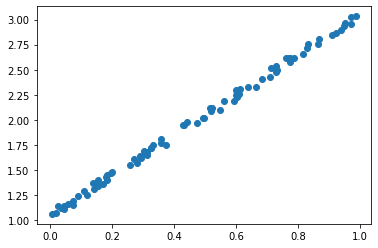

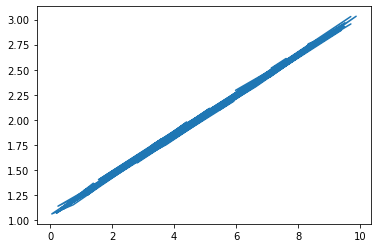

In [ ]:
plt.plot(x_train, y_train, 'o')
plt.show()
plt.plot(bad_x_train, y_train)
plt.show()
## Only change here is scaling of the x's

In [ ]:
## Learnings
# 1. large gradient(lets say w1 has high gradient) will have steeper curve.
# 2. There are two things of choosing while updating the weights -> learning rate and gradient -> Author gave example of trekking
# 3. Hence for the above thing, we have analyzed to use slower converge(faster convergence will have hig zig-zagging) and using balanced learning rate.
# 4. Learning rate is same for all the weights, hence we have to choose the learning rate according to steeper graphh because steeper graph will overshoot minima esaily.